In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
pd.set_option('display.max_columns', None) # show full dataframe

In [3]:
# import data
train_val = pd.read_csv("../data/training_set_values.csv")
train_label = pd.read_csv("../data/training_set_labels.csv")

In [4]:
train_val

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,03/05/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,07/05/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,11/04/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,08/03/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [5]:
train_val.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [6]:
# searching missing values

train_val["funder"].isna().value_counts()
train_val["installer"].isna().value_counts()
train_val["wpt_name"].isna().value_counts()
train_val["subvillage"].isna().value_counts()
train_val["public_meeting"].isna().value_counts()
train_val["scheme_management"].isna().value_counts()
train_val["scheme_name"].isna().value_counts()
train_val["permit"].isna().value_counts()

train_val["construction_year"].where(train_val["construction_year"] == 0).value_counts()


construction_year
0.0    20709
Name: count, dtype: int64

In [7]:
train_label

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [8]:
train_label["status_group"].isna().value_counts()
train_label["status_group"].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

## Dataset profile summary
### Training_set_values
- Size: 59400 rows x 40 columns  
- Data type: string, integer, float, boolean
    - NOTE: Data type of "date_recorded" is string.
- Columns contain the following information:
    - ID to identify individual water pump
    - dates when the record is filled and by whom the data is filled
    - by whom the water pump is funded
    - when and by whom the water pump is installed
    - where the water pump localates
    - who authorizes the water pump
    - technical specification of the water pump
    - water quality
    - source of the water
- Missing values were found in the following columns:
    - "funder", "installer", "wpt_name", "subvillage", "public_meeting", "scheme_management", "scheme_name", "permit", "construction_year"
### Treaining_label_set
- Size: 59400 rows x 2 columns
- Data type: integer, string
- Columns contain the following information:
    - ID to identify individual water pump
    - status of water pump (i.e. "functional", "non functional", "functional needs repair")

In [9]:
# generate statistics for numerical features
train_val.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [10]:
# generate statistics for categorical features
train_val.describe(include="object")

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,55763,55745,59398,59400,59029,59400,59400,59400,56066,59400,55522,30590,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1896,2145,37399,9,19287,21,125,2092,2,1,11,2695,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,15/03/2011,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


In [23]:
# check the ratio of each values in categorical data
col_name = "funder"
df = pd.DataFrame(train_val[col_name].value_counts().to_frame())
df["percent"] = df["count"] / len(train_val[col_name]) * 100
# df.where(df["percent"] > 1).dropna()
df

,count,percent
funder,,
Government Of Tanzania,9084,15.292929
Danida,3114,5.242424
Hesawa,2202,3.707071
Rwssp,1374,2.313131
World Bank,1349,2.271044
...,...,...
Kauzeni,1,0.001684
Juma,1,0.001684
Banca Reale,1,0.001684


In [12]:
# convert data type of "date_recorded" into datetime object since we can't see the timeline with string 

train_val_datetime = train_val.copy()
train_val_datetime["date_recorded"] = pd.to_datetime(train_val_datetime['date_recorded'])
train_val_datetime["date_recorded"].describe(include="object")

C:\Users\Owner\AppData\Local\Temp\ipykernel_11716\87527199.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_val_datetime["date_recorded"] = pd.to_datetime(train_val_datetime['date_recorded'])


count                            59400
mean     2012-03-29 09:11:33.818181888
min                2002-10-14 00:00:00
25%                2011-04-01 00:00:00
50%                2012-10-10 00:00:00
75%                2013-02-09 00:00:00
max                2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [13]:
# check if the distribution of IDs are similar to the one in training set
train_label.describe()

,id
count,59400.000000
mean,37115.131768
std,21453.128371
min,0.000000
25%,18519.750000
50%,37061.500000
75%,55656.500000
max,74247.000000


<Axes: xlabel='status_group'>

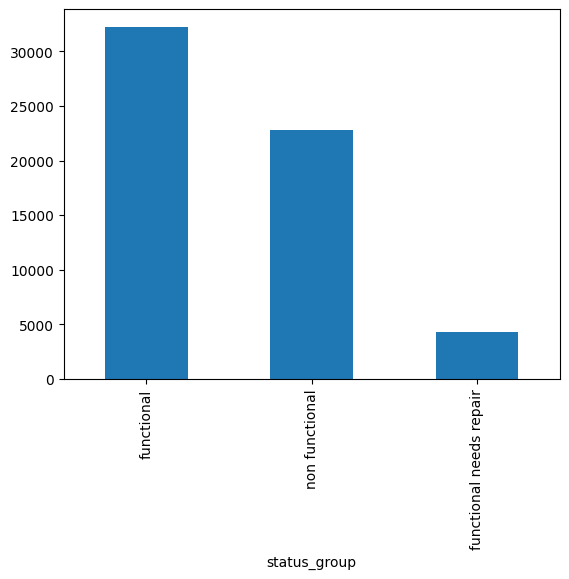

In [14]:
# check target variable distribution across classes
train_label["status_group"].value_counts().plot(kind="bar")

# Key observation:
Most water pumps are likely installed around in the middle of Tanzania between year 1986 - 2004.
VWC (Village Water Committees) manages and makes a scheme for most of water pumps, but 30% of water pumps are not permitted. 
Local people can use around 40% of water pupms for free. 
No water seems to be available in more than 50% of water pumps, but the labels shows 50-60% of water pumps are functional. Simply water pump is non-functional or need repare, or water source can be dried even though pumps are functional.

## Questions

- What is the unit of amount_tsh?
- What does num_private indicate? 
- What does public_meeting mean?
- permit: Who permit the water pump? Does the non-permitted pumps are illigal?

### Notes for myself
**Data characteristics**
- Id isn't sequential
- wpt_name is the name of water pump, so it makes sense that most values are none
- Maybe the value of latitude is minus if the land locates in south hemisphere.
- gps_height: Maybe minus value is Outliners
- extraction_year: The zero values affect the mean and we can't find the oldest year, so we might need to eliminat zero values.
- wpt_name: It is the name of water pump, so it makes sense that most values are none

**Key observations**
- No water can be availabe to most of water pumps, and around 20 liters of water is likely available in around 25% of water pumps.
    - Observed by 50% and 75 % tiles of armount_tbh.
- Most water pumps likely locates in the middle of Tanzania.
    - Observed by googling latitude and logitude in 25%-75% tiles. Latitude and longitude of Tanzania is 6.3690° S, 34.8888° E. 
- The highest elevation in Tanzania is 5895 meters, so most are installed in flat place or on the hill. 
    - Observed by gps_height
- Most of water pumps were installed from 1986-2004 and data doesn't show when 25% of water pumps were installed. 
    - Observed by "extraction_year".
- Around 30% of water pumps are not permitted.
- Almost 50% of water pumps use gravity to extract water.
- VWC take a responsibility for scheming and managing most of water pumps. VWC stands for Village Water Committees and it's a leagal management entites for rural water projects.
- Local people can use water from around 40% of water pumps for free.
    - Observed by "payment".
- Most of water qulity is good and water is extracted from ground. 
- Most common types of water point is communal standpipe.
- Around 50-60% of water pumps are functional according to labels.

